In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls 'drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 5-tarfi.rar				    photo-6.pdf
 Active_maghale.ipynb			    photo-7.pdf
 affain.m				    photo-8.pdf
 ahmad					   'photo-91(10).pdf'
'Colab Notebooks'			   'photo-92(11).pdf'
'Copy of Active.ipynb'			    photo-9.pdf
'Copy of Copy of Untitled1.ipynb'	   'pp (1).m'
 datamini				    pp.m
 datamini2				    pytorch
 demo.ipynb				    README.md
'dr.niazmardi NEURAL NETWORK PROJECT.rar'   RKH.rar
'dr sarajian.rar'			   'roshan asigment.rar'
'Getting started.pdf'			    rrr.rar
 hnet_net.pth				   'S4&5.rar'
 indianpines.pth			    sajjadroshan97100186.rar
 kernels.py				    segnetactive.ipynb
 khsravi.rar				   'Single Time AL.rar'
 LICENSE				    soltani
 maghale				    svm.py
 matdataset				    test2.tif
 mini					    test.tif
 paiannameh				   'try doual.ipynb'
 pdn					   'try patch doual.ipynb'
 photo-1.pdf				    Untitled3.m
 photo-2.pdf				    اسلاید-45-24.pdf

In [ ]:
!pip install modAL
import modAL
from modAL.models import ActiveLearner
from sklearn.neural_network import BernoulliRBM
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
import numpy as np
from sklearn import linear_model, datasets, metrics
from sklearn.pipeline import Pipeline
from sklearn import svm
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython import display
from matplotlib import pyplot as plt
import matplotlib as mpl
from math import pi
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import confusion_matrix
from sklearn.gaussian_process.kernels import RBF
import pandas as pd
import datetime
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#COVERT result to image
palette = {0 : (255, 255, 255), # Impervious surfaces (white)
           1 : (0, 0, 255),     # Buildings (blue)
           2 : (0, 255 ,255),   # vegetation (cyan)
           3 : (255, 0, 0),     # redclass (red)
           4 : (0,255,0),       # Tree (green)
           5 : (255, 255, 0)}   # yellow (cars)
lables = ['Impervious surfaces','Buildings','vegetation','Tree','redclass','Undefined']
invert_palette = {v: k for k, v in palette.items()}
def convert_to_color(arr_2d, palette=palette):
    """ Numeric labels to RGB-color encoding """
    arr_3d = np.zeros((arr_2d.shape[0], arr_2d.shape[1], 3), dtype=np.uint8)

    for c, i in palette.items():
        m = arr_2d == c
        arr_3d[m] = i

    return arr_3d

def convert_from_color(arr_3d, palette=invert_palette):
    """ RGB-color encoding to grayscale labels """
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

(127, 104)
(13208, 3)


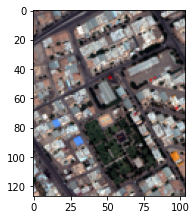

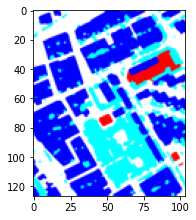

In [ ]:
#preper Data
#Image = io.imread("/content/drive/My Drive//mini/imagea1.tif");im = np.asarray(Image);im = im.reshape(im.shape[0] * im.shape[1],im.shape[2])#/255
#gt = io.imread("/content/drive/My Drive//mini/imgt.tif");g = np.asarray(gt);q = gt.reshape(gt.shape[0] * gt.shape[1],gt.shape[2])
Image = io.imread("/content/drive/My Drive//mini/image.tif");im = np.asarray(Image);im = im.reshape(im.shape[0] * im.shape[1],im.shape[2])#/255
gt = io.imread("/content/drive/My Drive//mini/gt.tif");g = np.asarray(gt);q = gt.reshape(gt.shape[0] * gt.shape[1],gt.shape[2])
l0 = Image.shape[0];l1 = Image.shape[1];l2 = Image.shape[2];
fig = plt.figure()
fig.add_subplot(121)
plt.imshow(Image)
fig = plt.figure()
fig.add_subplot(122)
plt.imshow(gt)
er = convert_from_color(gt, palette=invert_palette)
print(er.shape)
gtt = er.reshape(er.shape[0] * er.shape[1])
print(im.shape)

In [ ]:
#intila data number
n_initial = 100
#query num
n_queries = 20
#Data for active learning
im = 1/(np.max(im))*im
n_labeled_examples = gtt.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=300)

X_train = im[training_indices]
y_train = gtt[training_indices]

# Isolate the non-training examples we'll be querying.
X = np.delete(im, training_indices, axis=0)
y = np.delete(gtt, training_indices, axis=0)
X_pool, X_test, y_pool, y_test = train_test_split(X, y, test_size=0.57, random_state=42)
X_train1 = X_train;y_train1 = y_train;X_pool1 = X_pool;X_test1=X_test;y_pool1=y_pool;y_test1=y_test
print(im)

[[0.45490196 0.38431373 0.38823529]
 [0.38431373 0.30980392 0.30196078]
 [0.1254902  0.10196078 0.10196078]
 ...
 [0.33333333 0.29019608 0.30588235]
 [0.32941176 0.29803922 0.3254902 ]
 [0.24313725 0.22352941 0.25490196]]


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_pool.shape)
print(gtt.shape)
print(y_train.shape)
g0=0;g1=0;g2=0;g3=0;
for i in range(0,gtt.shape[0]):
  if gtt[i]==0:
   g0 = g0+1
  elif gtt[i]==1:
    g1 = g1 +1
  elif gtt[i]==2:
    g2 = g2 +1
  elif gtt[i]==3:
    g3 = g3+1
print(g0)
print(g1)
print(g2)
print(g3)

(300, 3)
(7360, 3)
(5552, 3)
(13208,)
(300,)
7249
4103
1595
261


In [ ]:
#Normal MLP
a = datetime.datetime.now()
ann = MLPClassifier(max_iter=1500, random_state=1,activation='logistic',solver='lbfgs')
ann.fit(X_pool, y_pool)
image = ann.predict(im)
acuracy = accuracy_score(image, gtt, normalize=True)
cmmlp = confusion_matrix(image , gtt)
image = image.reshape(l0,l1)
imaget = convert_to_color(image,palette=palette)
imaget = imaget.reshape(l0,l1,l2)
plt.imshow(imaget)
b = datetime.datetime.now();
d = b - a;d=float(d.total_seconds())
print(acuracy)
print(cmmlp)
print(d)

In [ ]:
image = ann.predict(im)
cmm = confusion_matrix(image,gtt,)
image = image.reshape(l0,l1)
imaget = convert_to_color(image,palette=palette)
imaget = imaget.reshape(l0,l1,l2)
plt.imshow(imaget)
io.imsave('annactive.tif',imaget)
print(cmm)
cm = pd.DataFrame(cmm)
cm.to_csv('annactive.csv')

In [ ]:
#ANN random sampling
X_train = X_train1;y_train = y_train1;X_pool = X_pool1;X_test=X_test1;y_pool=y_pool1;y_test=y_test1
n = 10
n_queries = 200
accrann=[];xlrann=[];tra=[];
a = datetime.datetime.now()
for i in range(n_queries):
  ann = MLPClassifier(max_iter=1500, random_state=1,activation='logistic',solver='lbfgs')
  ann.fit(X_train,y_train)
  n_labeled_examples = X_pool.shape[0]
  indices = np.random.randint(low=0, high=X_pool.shape[0], size=n)
  X_t = X_pool[indices]
  y_t = y_pool[indices]
  X_train =  np.concatenate((X_train,X_t))
  y_train =  np.concatenate((y_train,y_t))
  X_pool = np.delete(X_pool,indices , axis=0)
  y_pool = np.delete(y_pool,indices , axis=0)
  test_accuracyANN = ann.score(X_test,y_test);
  accrann = accrann + [test_accuracyANN*100];xlrann=xlrann+[len(X_train)]
  b = datetime.datetime.now();
  d = b - a;d=int(d.total_seconds());tra=tra+[d]
  full_accuracyANN = ann.score(im, gtt);
  messege = 'accuracy after query'+str(i)+'...'
  print(messege,'test:',test_accuracyANN,'...full:',full_accuracyANN)
b = datetime.datetime.now()
c = b - a
print( int(c.total_seconds() * 1000))

In [ ]:
image = ann.predict(im)
cmm = confusion_matrix(image,gtt,)
image = image.reshape(l0,l1)
imaget = convert_to_color(image,palette=palette)
imaget = imaget.reshape(l0,l1,l2)
plt.imshow(imaget)
io.imsave('annrandomsampling.tif',imaget)
print(cmm)
cm = pd.DataFrame(cmm)
cm.to_csv('annrandom.csv')

In [ ]:
#Active learning SVm
X_train = X_train1;y_train = y_train1;X_pool = X_pool1;X_test=X_test1;y_pool=y_pool1;y_test=y_test1
y_train = y_train.reshape(-1,1);y_test = y_test.reshape(-1,1);y_pool = y_pool.reshape(-1,1);gtt=gtt.reshape(-1,1)
n = 10
n_queries = 200
accs =[];xlas=[];tas=[]
a = datetime.datetime.now()
for i in range(n_queries):
  svc = svm.SVC(probability=True,kernel='poly')
  svc.fit(X_train,y_train)
  act1 = svc.predict_proba(X_pool)
  act = np.zeros((act1.shape[0]))
  for vv in range(0,act1.shape[0]):
    act [vv]= np.max(act1[vv][:])
  #if i == 0:
  #d = np.where(act > (np.mean(act)-np.std(act)));
  #act = act[d[0]];X_pool = X_pool[d[0]];y_pool = y_pool[d[0]];
  ind = np.argsort(act,kind = 'mergesort',axis = 0)
  X_pool = np.take_along_axis(X_pool, ind.reshape(-1,1), axis=0)
  y_pool = np.take_along_axis(y_pool, ind.reshape(-1,1), axis=0)
  X_train =  np.concatenate((X_train,X_pool[0:n]))
  y_train =  np.concatenate((y_train,y_pool[0:n]))
  X_pool = np.delete(X_pool,[*range(n)] , axis=0)
  y_pool = np.delete(y_pool,[*range(n)] , axis=0)
  test_accuracyANN = svc.score(X_test,y_test);
  accs = accs + [test_accuracyANN*100];xlas=xlas+[len(X_train)]
  b = datetime.datetime.now();
  d = b - a;d=int(d.total_seconds());tas=tas+[d]
  full_accuracyANN = svc.score(im, gtt);
  messege = 'accuracy after query'+str(i)+'...'
  print(messege,'test:',test_accuracyANN,'...full:',full_accuracyANN)

In [ ]:
image = svc.predict(im)
cmm = confusion_matrix(image,gtt,)
image = image.reshape(l0,l1)
imaget = convert_to_color(image,palette=palette)
imaget = imaget.reshape(l0,l1,l2)
plt.imshow(imaget)
io.imsave('svcractive.tif',imaget)
print(cmm)
cm = pd.DataFrame(cmm)
cm.to_csv('svcactivem.csv')

In [ ]:
#SVM random sampling
X_train = X_train1;y_train = y_train1;X_pool = X_pool1;X_test=X_test1;y_pool=y_pool1;y_test=y_test1
n = 10
n_queries = 200
accrsvm=[];xlrsvm=[];trs=[];
a = datetime.datetime.now()
for i in range(n_queries):
  svc = svm.SVC(probability=True,kernel='poly')
  svc.fit(X_train,y_train)
  n_labeled_examples = X_pool.shape[0]
  indices = np.random.randint(low=0, high=X_pool.shape[0], size=n)
  X_t = X_pool[indices]
  y_t = y_pool[indices]
  X_train =  np.concatenate((X_train,X_t))
  y_train =  np.concatenate((y_train,y_t))
  X_pool = np.delete(X_pool,indices , axis=0)
  y_pool = np.delete(y_pool,indices , axis=0)
  test_accuracyANN = svc.score(X_test,y_test);
  accrsvm = accrsvm + [test_accuracyANN*100];xlrsvm=xlrsvm+[len(X_train)];
  b = datetime.datetime.now();
  d = b - a;d=int(d.total_seconds());trs=trs+[d]
  full_accuracyANN = svc.score(im, gtt);
  messege = 'accuracy after query'+str(i)+'...'
  print(messege,'test:',test_accuracyANN,'...full:',full_accuracyANN)
b = datetime.datetime.now()
c = b - a
print( int(c.total_seconds() * 1000))

In [ ]:
a = datetime.datetime.now()
svc = svc.fit(X_pool,y_pool)
image = svc.predict(im)
cmm = confusion_matrix(image,gtt,)
image = image.reshape(l0,l1)
imaget = convert_to_color(image,palette=palette)
imaget = imaget.reshape(l0,l1,l2)
plt.imshow(imaget)
b = datetime.datetime.now();
d = b - a;d=float(d.total_seconds())
print(d)
io.imsave('svcrandom.tif',imaget)
print(cmm)
cm = pd.DataFrame(cmm)
cm.to_csv('svcrandom.csv')
full_accuracyANN = svc.score(im, gtt)
print(full_accuracyANN)

In [ ]:
import numpy as np
class MLClassifier:
    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        '''
        x - numpy array of shape (n, d); n = #observations; d = #variables
        y - numpy array of shape (n,)
        '''
        # no. of variables / dimension
        self.d = x.shape[1]

        # no. of classes; assumes labels to be integers from 0 to nclasses-1
        self.nclasses = len(set(y[:,0]))
        classes = tuple(set(y[:,0]))
        # list of means; mu_list[i] is mean vector for label i
        self.mu_list = []

        # list of inverse covariance matrices;
        # sigma_list[i] is inverse covariance matrix for label i
        # for efficiency reasons we store only the inverses
        self.sigma_inv_list = []

        # list of scalars in front of e^...
        self.scalars = []
        cls = classes
        n = x.shape[0]
        for i in range(self.nclasses):
            c = classes[i]
            # subset of obesrvations for label i
            cls_x = np.array([x[j] for j in range(n) if y[j] == c])

            mu = np.mean(cls_x, axis=0)

            # rowvar = False, this is to use columns as variables instead of rows
            sigma = np.cov(cls_x, rowvar=False)
            if np.sum(np.linalg.eigvals(sigma) <= 0) != 0:
                # if at least one eigenvalue is <= 0 show warning
                print(f'Warning! Covariance matrix for label {cls} is not positive definite!\n')

            sigma_inv = np.linalg.inv(sigma)

            scalar = 1/np.sqrt(((2*np.pi)**self.d)*np.linalg.det(sigma))

            self.mu_list.append(mu)
            self.sigma_inv_list.append(sigma_inv)
            self.scalars.append(scalar)

    def _class_likelihood(self, x: np.ndarray, cls: int) -> float:
        '''
        x - numpy array of shape (d,)
        cls - class label

        Returns: likelihood of x under the assumption that class label is cls
        '''
        mu = self.mu_list[cls]
        sigma_inv = self.sigma_inv_list[cls]
        scalar = self.scalars[cls]
        d = self.d

        exp = (-1/2)*np.dot(np.matmul(x-mu, sigma_inv), x-mu)

        return scalar * (np.e**exp)

    def predict(self, x: np.ndarray) -> int:
        '''
        x - numpy array of shape (d,)
        Returns: predicted label
        '''
        likelihoods = [self._class_likelihood(x, i) for i in range(self.nclasses)]
        return np.argmax(likelihoods),
    def like(self, x: np.ndarray) -> int:
        '''
        x - numpy array of shape (d,)
        Returns: predicted label
        '''
        likelihoods = [self._class_likelihood(x, i) for i in range(self.nclasses)]
        return np.max(likelihoods),
    def predicting(self, x: np.ndarray, y: np.ndarray) -> float:
        '''
        x - numpy array of shape (n, d); n = #observations; d = #variables
        y - numpy array of shape (n,)
        Returns: accuracy of predictions
        '''
        n = x.shape[0]
        predicted_y = np.array([self.predict(x[i]) for i in range(n)])
        #n_correct = np.sum(predicted_y == y)
        n_correct = predicted_y
        return n_correct
    def likehood(self, x: np.ndarray, y: np.ndarray) -> float:
        '''
        x - numpy array of shape (n, d); n = #observations; d = #variables
        y - numpy array of shape (n,)
        Returns: accuracy of predictions
        '''
        n = x.shape[0]
        predicted_y = np.array([self.like(x[i]) for i in range(n)])
        n_correct = predicted_y
        return n_correct

In [ ]:
#MLCnormal
#y_train = y_train.reshape(-1,1);y_test = y_test.reshape(-1,1);y_pool = y_pool.reshape(-1,1);gtt=gtt.reshape(-1,1)
X_train = X_train1;y_train = y_train1;X_pool = X_pool1;X_test=X_test1;y_pool=y_pool1;y_test=y_test1
y_train = y_train.reshape(-1,1);y_test = y_test.reshape(-1,1);y_pool = y_pool.reshape(-1,1);gtt=gtt.reshape(-1,1);accactivemlc=[];xlactivemlc=[]
a = datetime.datetime.now()
mlc=MLClassifier()
mlc.fit(X_pool,y_pool)
image = mlc.predicting(im,gtt)
acuracy = accuracy_score(image, gtt, normalize=True)
image = image.reshape(l0,l1)
imaget = convert_to_color(image,palette=palette)
imaget = imaget.reshape(l0,l1,l2)
plt.imshow(imaget)
b = datetime.datetime.now();
d = b - a;d=float(d.total_seconds() )
print(d)
atc = mlc.likehood(X_pool,y_pool)
print(atc)
print(acuracy)

In [ ]:
#maximum likelihood active Learning
X_train = X_train1;y_train = y_train1;X_pool = X_pool1;X_test=X_test1;y_pool=y_pool1;y_test=y_test1
y_train = y_train.reshape(-1,1);y_test = y_test.reshape(-1,1);y_pool = y_pool.reshape(-1,1);gtt=gtt.reshape(-1,1);
accactivemlc=[];xlactivemlc=[];tam=[]
n = 10
n_queries = 200
a = datetime.datetime.now()
for i in range(n_queries):
  mlc=MLClassifier()
  mlc.fit(X_train,y_train)
  act = mlc.likehood(X_pool,y_pool)
  #if i == 0:
  #d = np.where(act > (np.mean(act)-np.std(act)));
  #act = act[d[0]];X_pool = X_pool[d[0]];y_pool = y_pool[d[0]];
  inds = np.argsort(act,kind = 'mergesort',axis = 0)
  X_pool = np.take_along_axis(X_pool, inds, axis=0)
  y_pool = np.take_along_axis(y_pool, inds, axis=0)
  X_train =  np.concatenate((X_train,X_pool[0:n]))
  y_train =  np.concatenate((y_train,y_pool[0:n]))
  X_pool = np.delete(X_pool,[*range(n)] , axis=0)
  y_pool = np.delete(y_pool,[*range(n)] , axis=0)
  test_accuracyMLC = mlc.predicting(X_test,y_test);test_accuracyMLC = accuracy_score(y_test, test_accuracyMLC, normalize=True)*100;
  b = datetime.datetime.now();
  d = b - a;d=int(d.total_seconds() );tam=tam+[d]
  accactivemlc = accactivemlc + [test_accuracyMLC];xlactivemlc=xlactivemlc+[X_train.shape[0]]
  full_accuracyMLC = mlc.predicting(im, gtt);full_accuracyMLC = accuracy_score(gtt, full_accuracyMLC , normalize=True)*100;
  messege = 'accuracy after query'+str(i)+'...'
  print(messege,'test:',test_accuracyMLC,'...full:',full_accuracyMLC)

In [ ]:
image = mlc.predicting(im,gtt)
cmm = confusion_matrix(image,gtt,)
image = image.reshape(l0,l1)
imaget = convert_to_color(image,palette=palette)
imaget = imaget.reshape(l0,l1,l2)
plt.imshow(imaget)
io.imsave('mlcactive.tif',imaget)
print(cmm)
cm = pd.DataFrame(cmm)
cm.to_csv('mlcactivem.csv')

In [ ]:
#MLC random sampling
X_train = X_train1;y_train = y_train1;X_pool = X_pool1;X_test=X_test1;y_pool=y_pool1;y_test=y_test1
y_train = y_train.reshape(-1,1);y_test = y_test.reshape(-1,1);y_pool = y_pool.reshape(-1,1);gtt=gtt.reshape(-1,1);
n = 10
n_queries = 200
accrmlc=[];xlrmlc=[];trm=[]
a = datetime.datetime.now()
for i in range(n_queries):
  mlc=MLClassifier()
  mlc.fit(X_train,y_train)
  n_labeled_examples = X_pool.shape[0]
  indices = np.random.randint(low=0, high=X_pool.shape[0], size=n)
  X_t = X_pool[indices]
  y_t = y_pool[indices]
  X_train =  np.concatenate((X_train,X_t))
  y_train =  np.concatenate((y_train,y_t))
  X_pool = np.delete(X_pool,indices , axis=0)
  y_pool = np.delete(y_pool,indices , axis=0)
  test_accuracyMLC = mlc.predicting(X_test,y_test);test_accuracyMLC = accuracy_score(y_test, test_accuracyMLC, normalize=True)*100;
  b = datetime.datetime.now();
  d = b - a;d=int(d.total_seconds());trm=trm+[d]
  accrmlc = accrmlc + [test_accuracyMLC];xlrmlc=xlrmlc+[X_train.shape[0]]
  full_accuracyMLC = mlc.predicting(im, gtt);full_accuracyMLC = accuracy_score(gtt, full_accuracyMLC , normalize=True)*100;
  messege = 'accuracy after query'+str(i)+'...'
  print(messege,'test:',test_accuracyMLC,'...full:',full_accuracyMLC)
b = datetime.datetime.now()
c = b - a
print( int(c.total_seconds()))

In [ ]:
image = mlc.predicting(im,gtt)
cmm = confusion_matrix(image,gtt,)
image = image.reshape(l0,l1)
imaget = convert_to_color(image,palette=palette)
imaget = imaget.reshape(l0,l1,l2)
plt.imshow(imaget)
io.imsave('mlcrandom.tif',imaget)
print(cmm)
cm = pd.DataFrame(cmm)
cm.to_csv('mlcrandom.csv')

In [ ]:
#plot lengh
plt.plot(xlactivemlc,accactivemlc,"b")
plt.plot(xlrmlc,accrmlc,"r")
plt.plot(xlrann,accrann,"orange")
plt.plot(xla,acca,"c")
plt.plot(xlas,accs,"g")
plt.plot(xlrsvm,accrsvm,"y")
line1 = mpatches.Patch( label='ANN by active learning',color='c')
line2 = mpatches.Patch( label='Ann by random sampling',color='orange')
line3 = mpatches.Patch( label='DBN by active learning',color='green')
line4 = mpatches.Patch( label='DBN by random sampling',color='y')
line5 = mpatches.Patch( label='mlc by active learning',color='b')
line6 = mpatches.Patch( label='mlc by random sampling',color='r')
plt.legend(handles=[line1,line2,line3,line4,line5,line6],loc='lower right')
plt.savefig('xNEW.tif')

In [ ]:
plt.plot(tam,accactivemlc,"b")
plt.plot(trm,accrmlc,"r")
plt.plot(tra,accrann,"orange")
plt.plot(taa,acca,"c")
plt.plot(tas,accs,"g")
plt.plot(trs,accrsvm,"y")
line1 = mpatches.Patch( label='ANN by active learning',color='c')
line2 = mpatches.Patch( label='Ann by random sampling',color='orange')
line3 = mpatches.Patch( label='DBN by active learning',color='green')
line4 = mpatches.Patch( label='DBN by random sampling',color='y')
line5 = mpatches.Patch( label='mlc by active learning',color='b')
line6 = mpatches.Patch( label='mlc by random sampling',color='r')
plt.legend(handles=[line1,line2,line3,line4,line5,line6])
plt.savefig('tNEW.tif')

In [ ]:
#mlcstatics__________________________0.6353725015142337____________0.5__________
print(np.max(tam))
print(np.max(trm))
print(np.max(accactivemlc))
print(np.max(accrmlc))

In [ ]:
#PLOTMLC
plt.plot(tam,accactivemlc,"b")
plt.plot(trm,accrmlc,"r")
line5 = mpatches.Patch( label='mlc by active learning',color='b')
line6 = mpatches.Patch( label='mlc by random sampling',color='r')
plt.legend(handles=[line5,line6])
plt.savefig('tmlc.tif')

In [ ]:
#ann statics________________________0.7724106602059359_________53.27
print(np.max(taa))
print(np.max(tra))
print(np.max(acca))
print(np.max(accrann))

In [ ]:
#ann plot time
plt.plot(tra,accrann,"orange")
plt.plot(taa,acca,"c")
line1 = mpatches.Patch( label='ANN by active learning',color='c')
line2 = mpatches.Patch( label='Ann by random sampling',color='orange')
plt.legend(handles=[line1,line2])
plt.savefig('tann.tif')

In [ ]:
#ann plot X
plt.plot(xlrann,accrann,"orange")
plt.plot(xla,acca,"c")
line1 = mpatches.Patch( label='ANN by active learning',color='c')
line2 = mpatches.Patch( label='Ann by random sampling',color='orange')
plt.legend(handles=[line1,line2])
plt.savefig('tann.tif')

In [ ]:
#svm statics_________________73.40248334342823______________38.85
print(np.max(tas))
print(np.max(trs))
print(np.max(accs))
print(np.max(accrsvm))

In [ ]:
#plot svm time
plt.plot(tas,accs,"g")
plt.plot(trs,accrsvm,"y")
line3 = mpatches.Patch( label='DBN by active learning',color='green')
line4 = mpatches.Patch( label='DBN by random sampling',color='y')
plt.legend(handles=[line3,line4])
plt.savefig('xNEW.tif')

In [ ]:
cls_number = 4
h_gt = np.histogram(gt,bins =cls_number)
h_train = np.histogram(y_train,bins=cls_number)
h_test = np.histogram(y_test,bins=cls_number)
h_pool = np.histogram(y_pool,bins=cls_number)
print('train_histogram',h_train[0])
print('test_histogram',h_test[0])
print('pool_histogram',h_pool[0])
print('gt_histogram',h_gt[0])
print(np.max(y_train))

train_histogram [165  92  37   6]
test_histogram [4061 2284  874  141]
pool_histogram [3026 1727  685  114]
gt_histogram [13450  1129  1120 23925]
3
